### This notebook uses ROC data produced and saved by the script <i>analyze_roc_data.py</i> to make ROC and bar graphs for figs 2, 3, 4, and 5

In [2]:
import dill
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.transforms as transforms
from matplotlib.backends.backend_pdf import PdfPages

import numpy as np

%run ../JM_custom_figs.py
%run ../fx4roc.py
%run ../figs4roc.py

C:\Github\Distraction-Paper\JM_custom_figs.py:11: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [27]:
# figure settings
scattersize=50

#colors for distracted vs not distracted
colors_dis = ['grey', 'red']

# colors for different days
colors_days = ['darkturquoise','dodgerblue', 'darkblue']

In [28]:
datafolder = "C:\\Github\\Distraction-Paper\\data\\"
figfolder = "C:\\Github\\Distraction-Paper\\figs\\"
outputfolder = "C:\\Github\\Distraction-Paper\\output\\"

try:
    pickle_in = open(datafolder + "distraction_data_only_snips.pickle", 'rb')
except FileNotFoundError:
        print('Cannot access pickled file')

[modDict, disDict, habDict] = dill.load(pickle_in)

In [29]:
# loads in lick trials
pickle_in = open(outputfolder+"data4roc_licks.pickle", 'rb')
[mod_dis_hist, mod_notdis_hist, dis_dis_hist, dis_notdis_hist, hab_dis_hist, hab_notdis_hist] = dill.load(pickle_in)

# loads in photo snips
pickle_in = open(outputfolder+"data4roc_photo.pickle", 'rb')
[mod_dis_photo_snips_flat, mod_notdis_photo_snips_flat, dis_dis_photo_snips_flat, dis_notdis_photo_snips_flat, hab_dis_photo_snips_flat, hab_notdis_photo_snips_flat] = dill.load(pickle_in)


## Analysis for Fig 2 - lick rate between distracted and not distracted trials

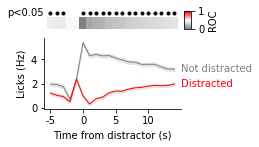

In [30]:
# Loads in ROC data for modelled vs distraction day ROC
try:
    pickle_in = open(outputfolder+"roc_licks_disday_disVnondis.pickle", 'rb')
except FileNotFoundError:
        print('Cannot access pickled file')
        
[a, p, data] = dill.load(pickle_in)
        
f = plt.figure(figsize=(3.4,2))
f, ax = plot_ROC_and_line(f, a, p, data[0], data[1],
                 cdict=[colors_dis[0], 'white', colors_dis[1]],
                 colors = colors_dis,
                 labels=['Not distracted', 'Distracted'],
                 labeloffset=0,
                 ylabel='Licks (Hz)')

# ax[1].set_yticks([-1, 0, 1])

f.savefig(figfolder+"fig2_roc-lickrate.pdf")

In [31]:
# find licks before and after distractor for all rats

def check_val_between(data, x1=0.001, x2=1.000):
    """ Checks if there is a value in a list between two numbers"""
    
    vals = [1 for d in data if d>x1 and d<x2]
    
    if sum(vals) > 0:
        return True
    else:
        return False

pickle_in = open(outputfolder+"data4epochs_licks.pickle", 'rb')
[mod_lick_snips, dis_lick_snips, hab_lick_snips] = dill.load(pickle_in)

pre_lickrate_dis, pre_lickrate_notdis = [], []
post_lickrate_dis, post_lickrate_notdis = [], []

for snips in dis_lick_snips:
    
    pre_dis, pre_notdis = [], []
    post_dis, post_notdis = [], []
    
    for snip in snips:
        
        nlicks_before_distractor = len([lick for lick in snip if lick<-2])
        nlicks_after_distractor = len([lick for lick in snip if lick>1])
        
        if check_val_between(snip):
            pre_notdis.append(nlicks_before_distractor)
            post_notdis.append(nlicks_after_distractor)
        else:
            pre_dis.append(nlicks_before_distractor)
            post_dis.append(nlicks_after_distractor)

    pre_lickrate_dis.append(np.mean(pre_dis)/10) # dividing by 10 puts this into Hz as a 10s predistractor period is used
    pre_lickrate_notdis.append(np.mean(pre_notdis)/10)
    
    post_lickrate_dis.append(np.mean(post_dis)/10)
    post_lickrate_notdis.append(np.mean(post_notdis)/10)

Pre distractor 2.307220313459323 0.03967546647845937
Post distractor 7.06055533088144 1.3180323000523508e-05


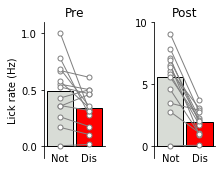

In [32]:
# plots panel for fig 2 showing bar graphs of pre and post lick rate and calculates stats

f, ax = plt.subplots(figsize=(3.4,2.5), ncols=2)
f.subplots_adjust(left=0.2, wspace=0.8)

barscatter([pre_lickrate_notdis, pre_lickrate_dis], paired=True,
           barfacecolor=['xkcd:light grey', colors_dis[1]], barfacecoloroption='individual',
           scattersize=scattersize,
           ax=ax[0])

barscatter([post_lickrate_notdis, post_lickrate_dis], paired=True,
           barfacecolor=['xkcd:light grey', colors_dis[1]], barfacecoloroption='individual',
           scattersize=scattersize,
           ax=ax[1])

for axis in ax:
    axis.set_xticks([1,2])
    axis.set_xticklabels(['Not', 'Dis'])
    
ax[0].set_ylabel('Lick rate (Hz)')
ax[0].set_yticks([0, 0.5, 1, 1.5])
ax[0].set_ylim([-0.11, 1.1])
ax[0].set_title('Pre')

# ax[1].set_ylabel('Mean post-distractor lick rate (Hz)')
ax[1].set_yticks([0, 5, 10])
ax[1].set_ylim([-1, 10])
ax[1].set_title('Post')

f.savefig(figfolder+"fig2_pre-and-post-distractor-lickrate.pdf")

from scipy import stats

t, p = stats.ttest_rel(pre_lickrate_notdis, pre_lickrate_dis)
print('Pre distractor', t, p)

t, p = stats.ttest_rel(post_lickrate_notdis, post_lickrate_dis)
print('Post distractor', t, p)

## Analysis for Fig 3 - photometry comparison between modelled and distraction day

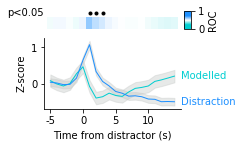

In [34]:
# Loads in ROC data for modelled vs distraction day ROC

pickle_in = open(outputfolder+"roc_photo_alltrials_modVdis.pickle", 'rb')
       
[a, p, data] = dill.load(pickle_in)
        
f = plt.figure(figsize=(3.4,2))
f, ax = plot_ROC_and_line(f, a, p, data[0], data[1],
                 cdict = [(0, colors_days[0]), (0.25, colors_days[0]), (0.5, 'white'), (0.75, colors_days[1]), (1, colors_days[1])],
                 colors = [colors_days[0], colors_days[1]],
                 labels=['Modelled', 'Distraction'],
                 labeloffset=0,
                 ylabel='Z-score')

# ax[1].set_yticks([-1, 0, 1])

f.savefig(figfolder+"fig3_roc-photo-modVdis.pdf")

In [35]:
# Loads in data to make bar graphs and combines all trials (distracted and not distracted) as first comparison is modelled vs. distraction ALL trials

pickle_in = open(outputfolder+"data4epochs_photo.pickle", 'rb')
[mod_dis_photo_snips, mod_notdis_photo_snips, dis_dis_photo_snips, dis_notdis_photo_snips, hab_dis_photo_snips, hab_notdis_photo_snips] = dill.load(pickle_in)

dis_all_photo_snips, mod_all_photo_snips, hab_all_photo_snips = [], [], []

for dis, nondis in zip(mod_dis_photo_snips, mod_notdis_photo_snips):
    mod_all_photo_snips.append(dis + nondis)
    
for dis, nondis in zip(dis_dis_photo_snips, dis_notdis_photo_snips):
    dis_all_photo_snips.append(dis + nondis)
    
for dis, nondis in zip(hab_dis_photo_snips, hab_notdis_photo_snips):
    hab_all_photo_snips.append(dis + nondis)


In [36]:
# divides data into 3 separate epochs

epoch1_mod, epoch1_dis = [], []
epoch2_mod, epoch2_dis = [], []
epoch3_mod, epoch3_dis = [], []

for day, epoch1, epoch2, epoch3 in zip([mod_all_photo_snips, dis_all_photo_snips],
                             [epoch1_mod, epoch1_dis],
                              [epoch2_mod, epoch2_dis],
                                      [epoch3_mod, epoch3_dis]):
    for rat in day:
        e1, e2, e3 = [], [], []
        for snip in rat:
            e1.append(np.mean(snip[0:5]))
            e2.append(np.mean(snip[6:9]))
            e3.append(np.mean(snip[9:]))
        epoch1.append(np.mean(e1))
        epoch2.append(np.mean(e2))
        epoch3.append(np.mean(e3))

Epoch 1 - pre 0.4437902564302567 0.6650905923021398
Epoch 2 - dis -3.0633974822528196 0.00983674509410371
Epoch 3 - post -0.10424863573716375 0.9186941607447985


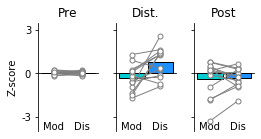

In [37]:
f, ax = plt.subplots(figsize=(4,2), ncols=3)
f.subplots_adjust(left=0.15, wspace=0.3)

colors=[colors_days[0], colors_days[1]]

barscatter([epoch1_mod, epoch1_dis], paired=True,
           barfacecolor=colors, barfacecoloroption='individual',
           scattersize=scattersize,
           ax=ax[0])

barscatter([epoch2_mod, epoch2_dis], paired=True,
           barfacecolor=colors, barfacecoloroption='individual',
           scattersize=scattersize,
           ax=ax[1])

barscatter([epoch3_mod, epoch3_dis], paired=True,
           barfacecolor=colors, barfacecoloroption='individual',
           scattersize=scattersize,
           ax=ax[2])

for axis in ax:
    axis.set_xticks([])
    axis.set_ylim([-4, 3.5])
    axis.set_yticks([-3, 0, 3])
    axis.set_yticklabels([])
    axis.text(1, -3.9, 'Mod', ha='center')
    axis.text(2, -3.9, 'Dis', ha='center')
    
ax[0].set_ylabel('Z-score')

ax[0].set_yticklabels(["-3", '0', '3'])

ax[0].set_title('Pre')
ax[1].set_title('Dist.')
ax[2].set_title('Post')

f.savefig(figfolder+"fig3_photo_modVdis_epochs.pdf")

from scipy import stats

t, p = stats.ttest_rel(epoch1_mod, epoch1_dis)
print('Epoch 1 - pre', t, p)

t, p = stats.ttest_rel(epoch2_mod, epoch2_dis)
print('Epoch 2 - dis', t, p)

t, p = stats.ttest_rel(epoch3_mod, epoch3_dis)
print('Epoch 3 - post', t, p)

## Analysis for Fig 4 - photometry comparison between distracted and not distracted trials (distraction day)

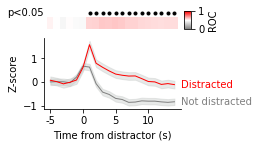

In [38]:
# Loads in ROC data for modelled vs distraction day ROC
try:
    pickle_in = open(outputfolder+"roc_photo_disday_disVnotdis.pickle", 'rb')
except FileNotFoundError:
        print('Cannot access pickled file')
        
[a, p, data] = dill.load(pickle_in)
        
f = plt.figure(figsize=(3.4,2))
f, ax = plot_ROC_and_line(f, a, p, data[0], data[1],
                 cdict=[colors_dis[0], 'white', colors_dis[1]],
                 colors = colors_dis,
                 labels=['Not distracted', 'Distracted'],
                 labeloffset=0,
                 ylabel='Z-score')

# ax[1].set_yticks([-1, 0, 1])

f.savefig(figfolder+"fig4_roc-photo-disVnondis.pdf")

In [39]:
try:
    pickle_in = open(outputfolder+"roc_results_photo_disVnotdis.pickle", 'rb')
except FileNotFoundError:
        print('Cannot access pickled file')

[a, p, photo_snips_dis, photo_snips_notdis] = dill.load(pickle_in)

In [40]:
# organises data into epochs for bar graph panel

epoch1_notdis, epoch1_dis  = [], []
epoch2_notdis, epoch2_dis  = [], []
epoch3_notdis, epoch3_dis = [], []

for day, epoch1, epoch2, epoch3 in zip([dis_notdis_photo_snips, dis_dis_photo_snips],
                                       [epoch1_notdis, epoch1_dis],
                                       [epoch2_notdis, epoch2_dis],
                                       [epoch3_notdis, epoch3_dis]):
    for rat in day:
        e1, e2, e3 = [], [], []
        for snip in rat:
            e1.append(np.mean(snip[0:5]))
            e2.append(np.mean(snip[6:9]))
            e3.append(np.mean(snip[9:]))
        epoch1.append(np.mean(e1))
        epoch2.append(np.mean(e2))
        epoch3.append(np.mean(e3))

Epoch 1 - pre -0.2427519078322366 0.8122971795245387
Epoch 2 - dis -2.53313426068498 0.026267685005721655
Epoch 3 - post -5.565975721698865 0.00012260677228993286


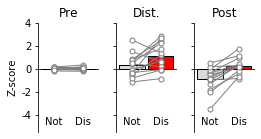

In [41]:
f, ax = plt.subplots(figsize=(4,2), ncols=3)
f.subplots_adjust(left=0.15, wspace=0.3)

colors=['xkcd:light grey', colors_dis[1]]

barscatter([epoch1_notdis, epoch1_dis], paired=True,
           barfacecolor=colors, barfacecoloroption='individual',
           scattersize=scattersize,
           ax=ax[0])

barscatter([epoch2_notdis, epoch2_dis], paired=True,
           barfacecolor=colors, barfacecoloroption='individual',
           scattersize=scattersize,
           ax=ax[1])

barscatter([epoch3_notdis, epoch3_dis], paired=True,
           barfacecolor=colors, barfacecoloroption='individual',
           scattersize=scattersize,
           ax=ax[2])

for axis in ax:
    axis.set_xticks([])
    axis.set_ylim([-5.5, 4])
    axis.set_yticks([-4, -2, 0, 2, 4])
    axis.set_yticklabels([])
    axis.text(1, -4.9, 'Not', ha='center')
    axis.text(2, -4.9, 'Dis', ha='center')
    
ax[0].set_ylabel('Z-score')

ax[0].set_yticklabels(["-4", "-2", '0', '2', '4'])

ax[0].set_title('Pre')
ax[1].set_title('Dist.')
ax[2].set_title('Post')

f.savefig(figfolder+"fig4_photo_disVnotdis_epochs.pdf")

from scipy import stats

t, p = stats.ttest_rel(epoch1_notdis, epoch1_dis)
print('Epoch 1 - pre', t, p)

t, p = stats.ttest_rel(epoch2_notdis, epoch2_dis)
print('Epoch 2 - dis', t, p)

t, p = stats.ttest_rel(epoch3_notdis, epoch3_dis)
print('Epoch 3 - post', t, p)

## Analysis for Fig 5 - photometry comparison between distraction day and habituation day - all trials then distracted and not distracted separately

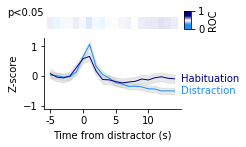

In [43]:
# Loads in ROC data for distraction vs habituation day ROC - ALL trials
pickle_in = open(outputfolder+"roc_photo_alltrials_disVhab.pickle", 'rb')
       
[a, p, data] = dill.load(pickle_in)
        
f = plt.figure(figsize=(3.4,2))
f, ax = plot_ROC_and_line(f, a, p, data[0], data[1],
                 cdict = [(0, colors_days[1]), (0.25, colors_days[1]), (0.5, 'white'), (0.75, colors_days[2]), (1, colors_days[2])],
                 colors = [colors_days[1], colors_days[2]],
                 labels=['Distraction', 'Habituation'],
                 labeloffset=0,
                 ylabel='Z-score')

ax[1].set_yticks([-1, 0, 1])
ax[1].set_ylim([-1.1, 1.3])

f.savefig(figfolder+"fig5_roc-photo-disVhab.pdf")

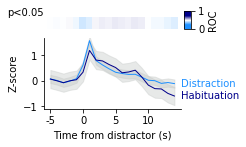

In [44]:
# Loads in ROC data for distraction vs habituation day ROC - ONLY DISTRACTED TRIALS
pickle_in = open(outputfolder+"roc_photo_distrials_disVhab.pickle", 'rb')
       
[a, p, data] = dill.load(pickle_in)
        
f = plt.figure(figsize=(3.4,2))
f, ax = plot_ROC_and_line(f, a, p, data[0], data[1],
                 cdict = [(0, colors_days[1]), (0.25, colors_days[1]), (0.5, 'white'), (0.75, colors_days[2]), (1, colors_days[2])],
                 colors = [colors_days[1], colors_days[2]],
                 labels=['Distraction', 'Habituation'],
                 labeloffset=0,
                 ylabel='Z-score')


ax[1].set_yticks([-1, 0, 1])
ax[1].set_ylim([-1.1, 1.7])

f.savefig(figfolder+"fig5_roc-photo-disVhab-onlyDIS.pdf")

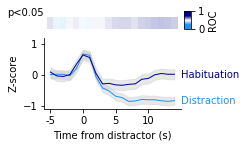

In [45]:
# Loads in ROC data for distraction vs habituation day ROC - ONLY NOT DISTRACTED TRIALS
pickle_in = open(outputfolder+"roc_photo_notdistrials_disVhab.pickle", 'rb')
       
[a, p, data] = dill.load(pickle_in)
        
f = plt.figure(figsize=(3.4,2))
f, ax = plot_ROC_and_line(f, a, p, data[0], data[1],
                 cdict = [(0, colors_days[1]), (0.25, colors_days[1]), (0.5, 'white'), (0.75, colors_days[2]), (1, colors_days[2])],
                 colors = [colors_days[1], colors_days[2]],
                 labels=['Distraction', 'Habituation'],
                 labeloffset=0,
                 ylabel='Z-score')


ax[1].set_yticks([-1, 0, 1])
ax[1].set_ylim([-1.1, 1.2])

f.savefig(figfolder+"fig5_roc-photo-disVhab-onlyNOTDIS.pdf")

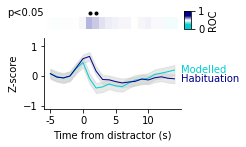

In [100]:
# Loads in ROC data for modelled vs distraction day ROC
pickle_in = open(outputfolder+"roc_photo_alltrials_modVhab.pickle", 'rb')
       
[a, p, data] = dill.load(pickle_in)
        
f = plt.figure(figsize=(3.4,2))
f, ax = plot_ROC_and_line(f, a, p, data[0], data[1],
                 cdict = [(0, colors[0]), (0.25, colors[0]), (0.5, 'white'), (0.75, colors[2]), (1, colors[2])],
                 colors = [colors[0], colors[2]],
                 labels=['Modelled', 'Habituation'],
                 labeloffset=0,
                 ylabel='Z-score')


ax[1].set_yticks([-1, 0, 1])
ax[1].set_ylim([-1.1, 1.3])

f.savefig(figfolder+"fig5_roc-photo-modVhab.pdf")

### Stuff below this here is not used

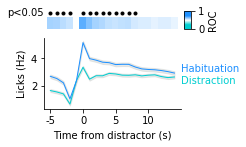

In [87]:
# Loads in ROC data for modelled vs distraction day ROC
pickle_in = open(outputfolder+"roc_licks_alltrials_disVhab.pickle", 'rb')
       
[a, p, data] = dill.load(pickle_in)
        
f = plt.figure(figsize=(3.4,2))
f, ax = plot_ROC_and_line(f, a, p, data[0], data[1],
                 cdict = [(0, 'darkturquoise'), (0.25, 'darkturquoise'), (0.5, 'white'), (0.75, 'dodgerblue'), (1, 'dodgerblue')],
                 colors = ['darkturquoise', 'dodgerblue'],
                 labels=['Distraction', 'Habituation'],
                 labeloffset=0.3,
                 ylabel='Licks (Hz)')

# ax[1].set_yticks([-1, 0, 1])

# f.savefig(figfolder+"fig3_roc-photo-modVdis.pdf")

